In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset/BankCreditCard.csv")
dataset.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
Customer ID               30000 non-null int64
Credit_Amount             30000 non-null float64
Gender                    30000 non-null int64
Academic_Qualification    30000 non-null int64
Marital                   30000 non-null int64
Age_Years                 30000 non-null int64
Repayment_Status_Jan      30000 non-null int64
Repayment_Status_Feb      30000 non-null int64
Repayment_Status_March    30000 non-null int64
Repayment_Status_April    30000 non-null int64
Repayment_Status_May      30000 non-null int64
Repayment_Status_June     30000 non-null int64
Jan_Bill_Amount           30000 non-null float64
Feb_Bill_Amount           30000 non-null float64
March_Bill_Amount         30000 non-null float64
April_Bill_Amount         30000 non-null float64
May_Bill_Amount           30000 non-null float64
June_Bill_Amount          30000 non-null float64
Previous_Payment_Jan      30000

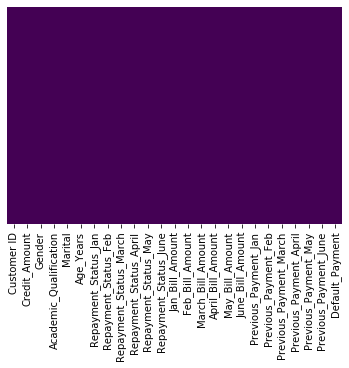

In [4]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# we can see there is no data is missing. 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Default_Payment',axis=1), dataset['Default_Payment'] ,test_size=0.30, 
                                                    random_state=101)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7058
           1       0.67      0.00      0.00      1942

    accuracy                           0.78      9000
   macro avg       0.73      0.50      0.44      9000
weighted avg       0.76      0.78      0.69      9000

[[7057    1]
 [1940    2]]


## Try some other options

In [12]:
from sklearn.feature_selection import RFE

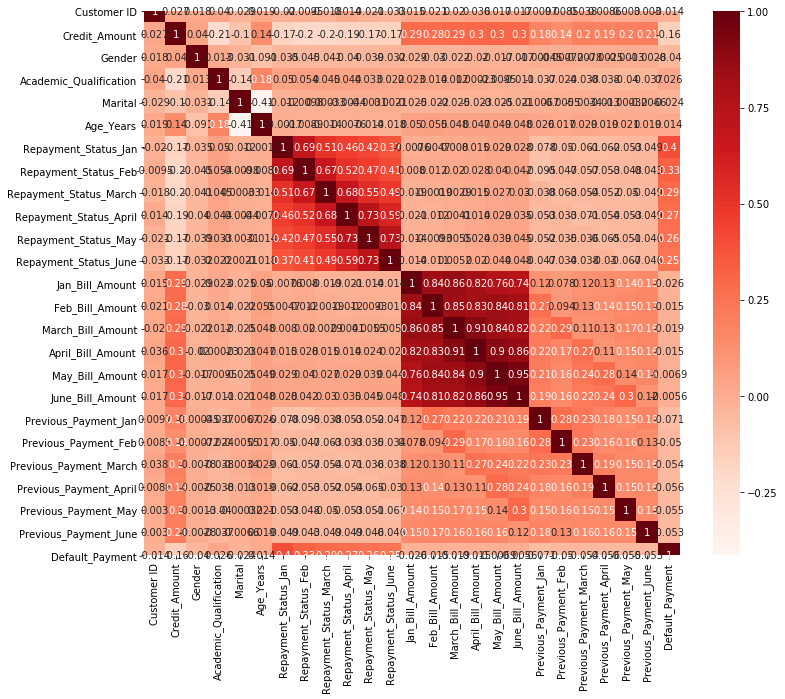

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()    

In [57]:
import statsmodels.api as sm
X_1 = sm.add_constant(dataset)
#Fitting sm.OLS model
model = sm.OLS(dataset['Default_Payment'],X_1).fit()
round(model.pvalues, 15)

const                     0.000000
Customer ID               0.801857
Credit_Amount             0.000000
Gender                    0.560840
Academic_Qualification    0.650006
Marital                   0.988009
Age_Years                 0.000000
Repayment_Status_Jan      0.797734
Repayment_Status_Feb      0.633033
Repayment_Status_March    0.884525
Repayment_Status_April    0.066473
Repayment_Status_May      0.189161
Repayment_Status_June     0.701591
Jan_Bill_Amount           0.000000
Feb_Bill_Amount           0.000000
March_Bill_Amount         0.000000
April_Bill_Amount         0.000000
May_Bill_Amount           0.001862
June_Bill_Amount          0.000000
Previous_Payment_Jan      0.000000
Previous_Payment_Feb      0.000000
Previous_Payment_March    0.000000
Previous_Payment_April    0.000000
Previous_Payment_May      0.000000
Previous_Payment_June     0.000000
Default_Payment           0.000000
dtype: float64

In [55]:
#Backward Elimination
cols = list(dataset.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = dataset[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(dataset['Default_Payment'],X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if( pmax > 0.005):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Credit_Amount', 'Gender', 'Repayment_Status_April', 'Repayment_Status_May', 'Jan_Bill_Amount', 'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb', 'Previous_Payment_March', 'Previous_Payment_April', 'Previous_Payment_May', 'Default_Payment']


In [81]:
update_dataset = dataset[[
    'Gender',
    'Repayment_Status_Jan',
    "Repayment_Status_Feb",     
    "Repayment_Status_March",
    "Repayment_Status_April",
    "Repayment_Status_May",
    "Repayment_Status_June",
    "May_Bill_Amount"
    ]]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(update_dataset, dataset['Default_Payment'] ,test_size=0.30, random_state=101)

In [82]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train_1,y_train_1)
predictions_1 = logmodel_1.predict(X_test_1)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
print(classification_report(y_test_1,predictions_1))
print(confusion_matrix(y_test_1, predictions_1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7058
           1       0.66      0.26      0.37      1942

    accuracy                           0.81      9000
   macro avg       0.74      0.61      0.63      9000
weighted avg       0.79      0.81      0.78      9000

[[6796  262]
 [1437  505]]
